In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report  # Adicionei o classification_report aqui
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Carregar o arquivo CSV
dados = pd.read_csv('penguins_lter.csv')

In [42]:
# Exibir as primeiras linhas para inspecionar os dados
print(dados.head())

  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \


In [43]:
# Verificar informações sobre o DataFrame
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [44]:
# Verificar valores ausentes
print(dados.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


In [45]:
# Descrição estatística das colunas numéricas
print(dados.describe())

       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000       

In [46]:
# Remover linhas com valores ausentes
dados = dados.dropna()

In [47]:
# Codificando variáveis categóricas
label_encoders = {}
categorical_columns = ['species', 'island', 'sex'] 

In [48]:
for col in categorical_columns:
    if col in dados.columns:
        le = LabelEncoder()
        dados[col + '_encoded'] = le.fit_transform(dados[col])
        label_encoders[col] = le

In [49]:
# Verificar as colunas após a codificação
print(dados.head())

   studyName  Sample Number                              Species  Region  \
6    PAL0708              7  Adelie Penguin (Pygoscelis adeliae)  Anvers   
7    PAL0708              8  Adelie Penguin (Pygoscelis adeliae)  Anvers   
28   PAL0708             29  Adelie Penguin (Pygoscelis adeliae)  Anvers   
29   PAL0708             30  Adelie Penguin (Pygoscelis adeliae)  Anvers   
38   PAL0708             39  Adelie Penguin (Pygoscelis adeliae)  Anvers   

       Island               Stage Individual ID Clutch Completion  Date Egg  \
6   Torgersen  Adult, 1 Egg Stage          N4A1                No  11/15/07   
7   Torgersen  Adult, 1 Egg Stage          N4A2                No  11/15/07   
28     Biscoe  Adult, 1 Egg Stage         N18A1                No  11/10/07   
29     Biscoe  Adult, 1 Egg Stage         N18A2                No  11/10/07   
38      Dream  Adult, 1 Egg Stage         N25A1                No  11/13/07   

    Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body

In [50]:
# Normalização das colunas numéricas
colunas_numericas = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
scaler = MinMaxScaler(feature_range=(0, 1))
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

In [51]:
print(dados.columns)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


In [52]:
# Seleção de colunas para o modelo
X = dados[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].values
Y = dados['Species'].values  # Note o nome correto da coluna 'species_encoded'

In [53]:
# Dividindo o dataset em conjunto de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=0)


In [54]:
# Aplicando o modelo Naive-Bayes
modelo1 = GaussianNB()
modelo1.fit(X_treino, Y_treino)
Y_previsto = modelo1.predict(X_teste)

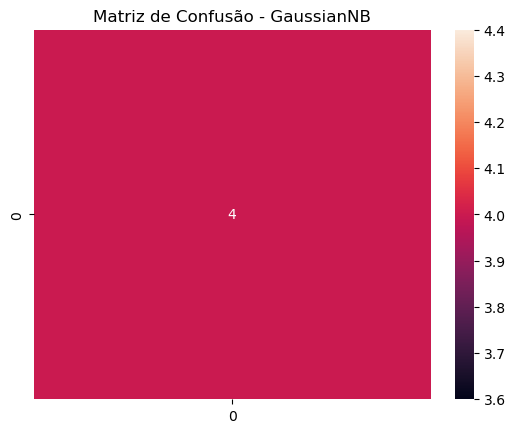

In [57]:
# Gerando a matriz de confusão e métricas de avaliação
cm1 = confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title("Matriz de Confusão - GaussianNB")
plt.show()


In [58]:
print("Acurácia (Treinamento): {:.2f}%".format(modelo1.score(X_treino, Y_treino) * 100))
print("Acurácia (Teste): {:.2f}%".format(modelo1.score(X_teste, Y_teste) * 100))


Acurácia (Treinamento): 100.00%
Acurácia (Teste): 100.00%


In [62]:
cr = classification_report(Y_teste, Y_previsto)
print("Relatório de Classificação - GaussianNB:")
print(cr)

Relatório de Classificação - GaussianNB:
                                     precision    recall  f1-score   support

Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00         4

                           accuracy                           1.00         4
                          macro avg       1.00      1.00      1.00         4
                       weighted avg       1.00      1.00      1.00         4

